In [37]:
# Data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression

# For splitting data and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [38]:
data = pd.read_csv('./datasets/man2122.csv')
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,energy_production,humidity,solar_irradiance,temperature
0,2021-01-01,148961,74.899631,593.374910,17.137480
1,2021-01-02,142961,72.835792,552.416736,13.170568
2,2021-01-03,153821,74.754549,566.169583,18.023196
3,2021-01-04,152869,79.307543,483.104079,16.913281
4,2021-01-05,153901,70.330526,591.455060,13.868961


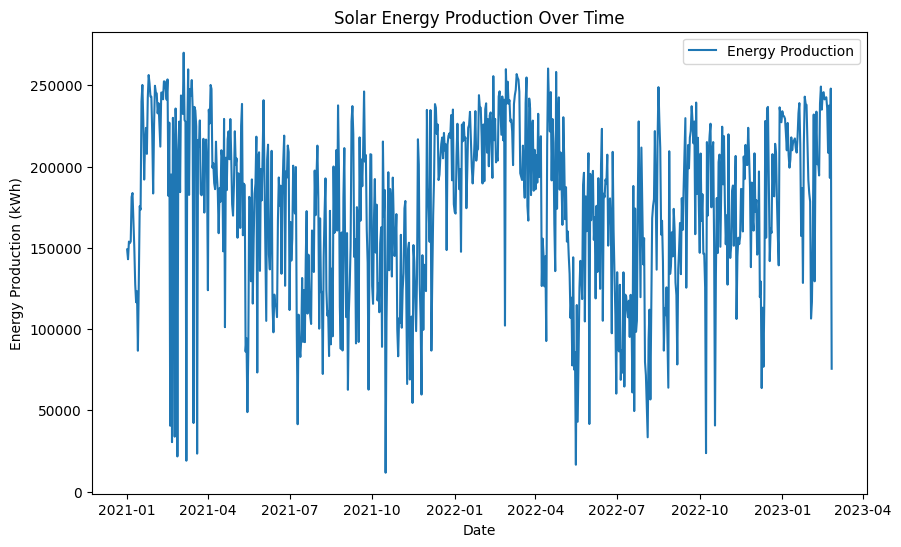

In [39]:
# Plot the solar energy production over time
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['energy_production'], label='Energy Production')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.title('Solar Energy Production Over Time')
plt.legend()
plt.show()

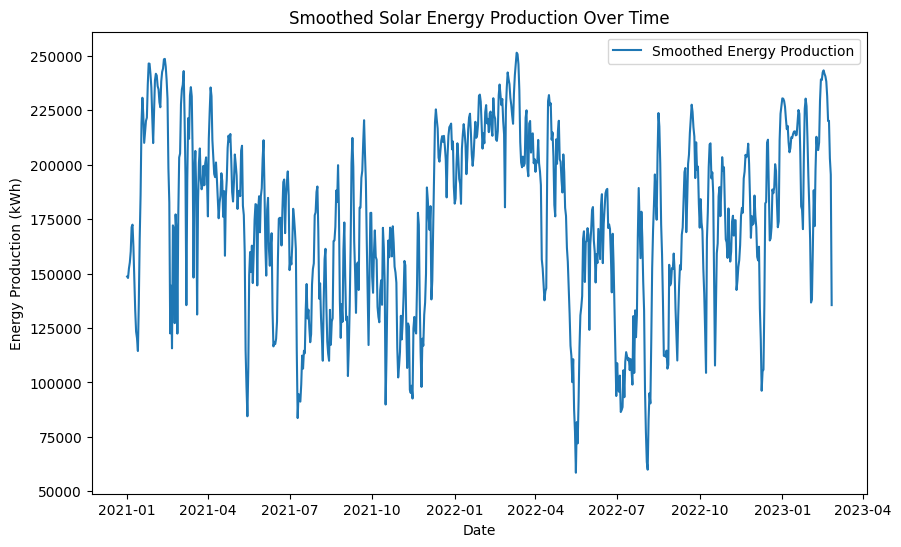

In [40]:
from pykalman import KalmanFilter
# Initialize the Kalman Filter
kf = KalmanFilter(initial_state_mean=data['energy_production'].iloc[0], n_dim_obs=1)
# Apply the Kalman Filter to smooth the energy production data
data['energy_production'], _ = kf.smooth(data['energy_production'])

# Apply a moving average with a window size of 7 days
# data['energy_production'] = data['energy_production'].rolling(window=7, min_periods=1).mean()
# data['energy_production'] = data['energy_production'].ewm(span=7, adjust=False).mean()

# from scipy.signal import savgol_filter
# Apply Savitzky-Golay filter with a window size of 7 and polynomial order of 2
# data['energy_production'] = savgol_filter(data['energy_production'], window_length=7, polyorder=2)

# Plot the smoothed energy production over time
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['energy_production'], label='Smoothed Energy Production')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.title('Smoothed Solar Energy Production Over Time')
plt.legend()
plt.show()

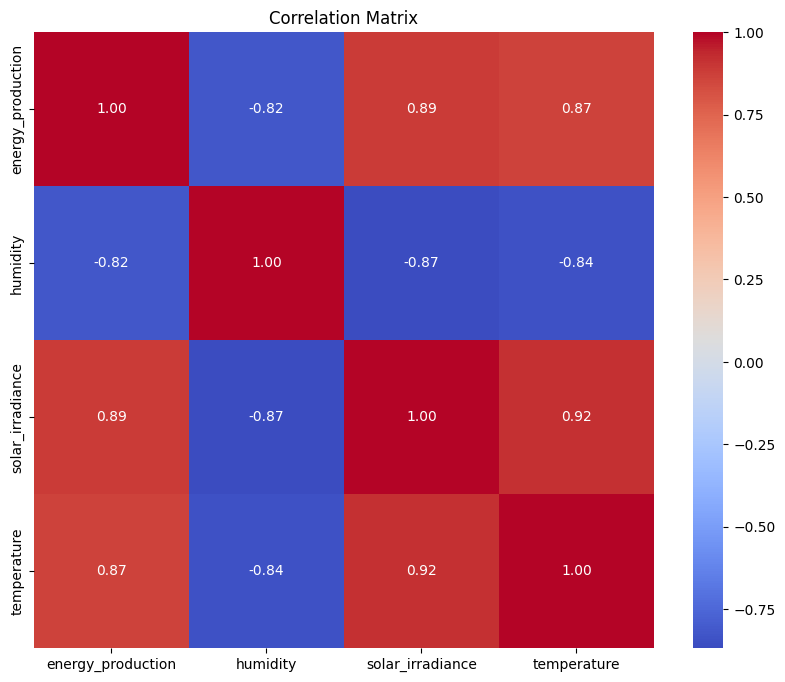

In [41]:
# Filter out non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

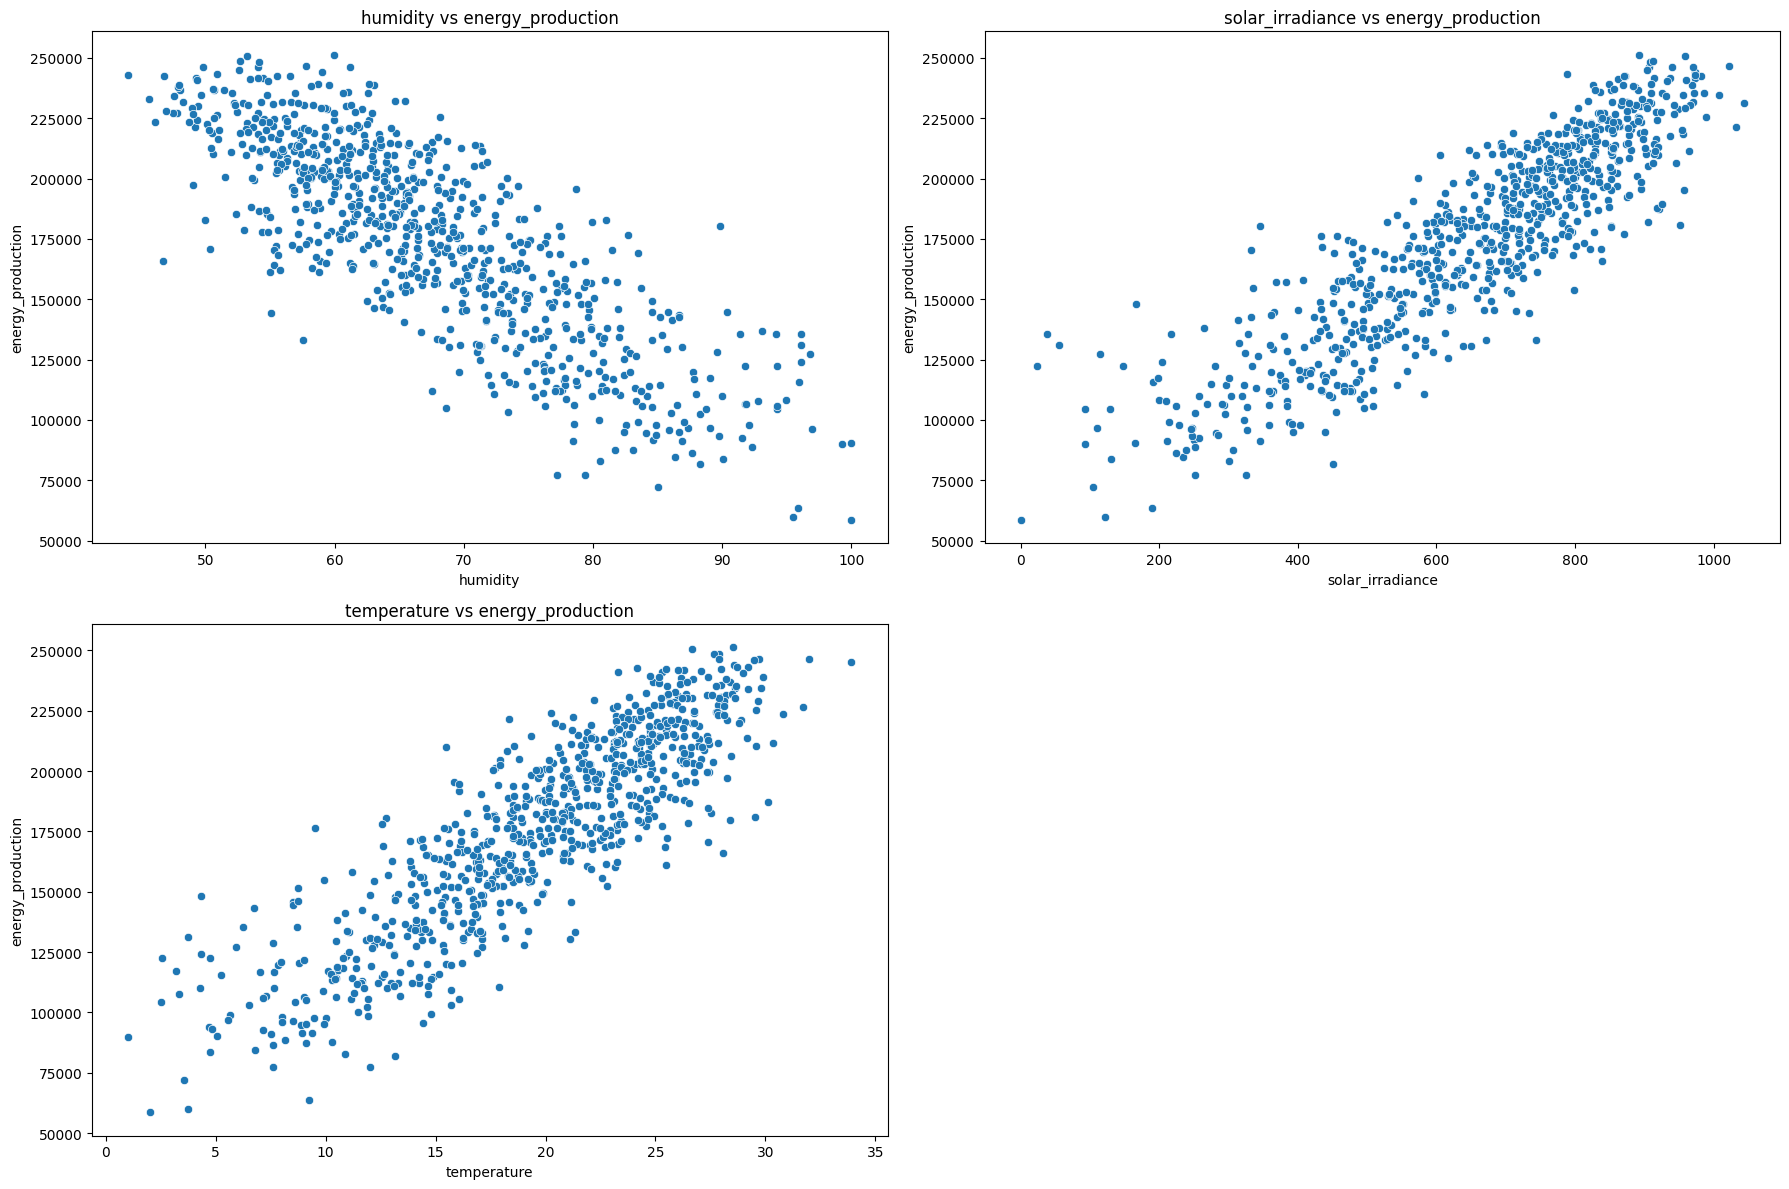

In [42]:
# Plot pairwise relationships between each feature and the target variable
features = ['humidity', 'solar_irradiance', 'temperature']
target = 'energy_production'

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x=data[features[0]], y=data[target])
plt.title(f'{features[0]} vs {target}')
plt.xlabel(features[0])
plt.ylabel(target)

plt.subplot(2, 2, 2)
sns.scatterplot(x=data[features[1]], y=data[target])
plt.title(f'{features[1]} vs {target}')
plt.xlabel(features[1])
plt.ylabel(target)

plt.subplot(2, 2, 3)
sns.scatterplot(x=data[features[2]], y=data[target])
plt.title(f'{features[2]} vs {target}')
plt.xlabel(features[2])
plt.ylabel(target)

plt.tight_layout()
plt.show()

In [43]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Split target (y) and exogenous variables (X) for both train and test sets
y_train = train_data['energy_production']
X_train = train_data[['humidity', 'temperature', 'solar_irradiance']]

y_test = test_data['energy_production']
X_test = test_data[['humidity', 'temperature', 'solar_irradiance']]



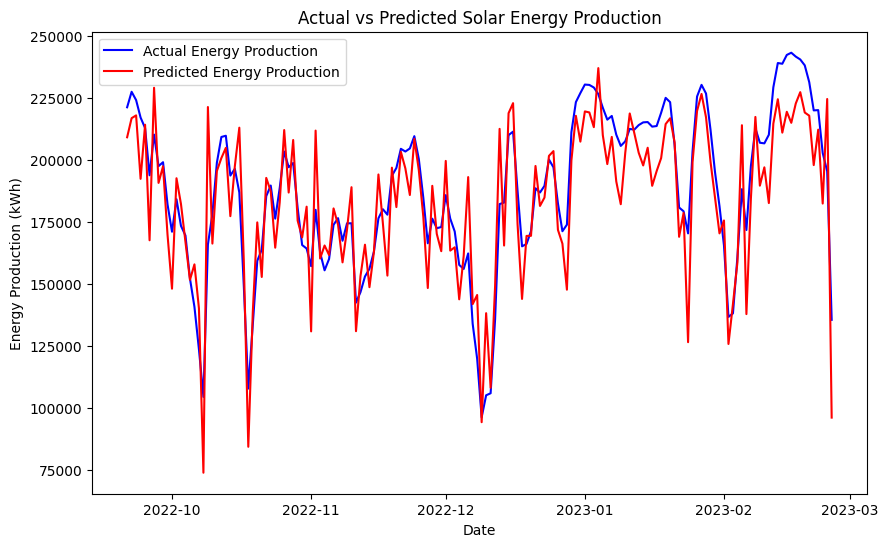

In [44]:
# Define and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
predicted_values = linear_model.predict(X_test)

# Plot actual vs predicted energy production with correct date formatting
plt.figure(figsize=(10,6))
plt.plot(test_data['date'], y_test, label='Actual Energy Production', color='blue')
plt.plot(test_data['date'], predicted_values, label='Predicted Energy Production', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.title('Actual vs Predicted Solar Energy Production')
plt.legend()
plt.show()



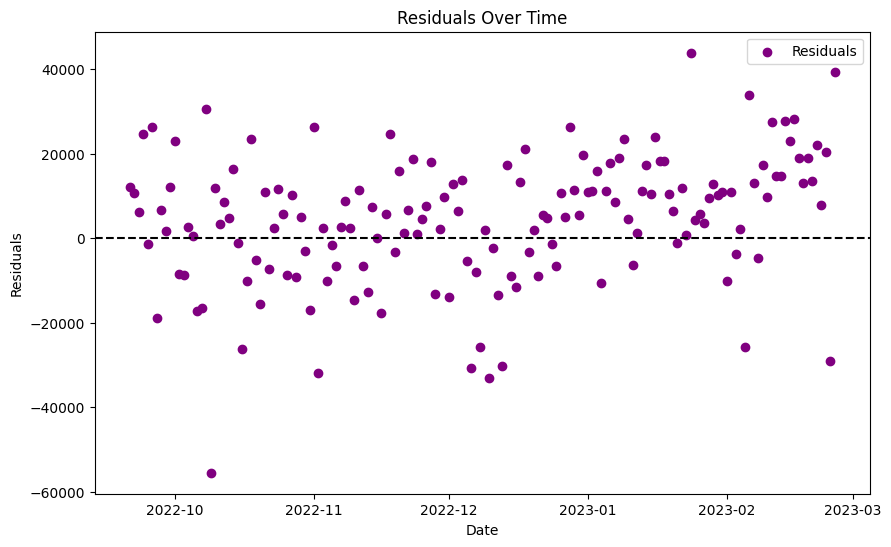

In [45]:
residuals = y_test - predicted_values

# Reset index to access 'date' column
test_data_reset = test_data.reset_index()

# Plot residuals as a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(test_data_reset['date'], residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.show()


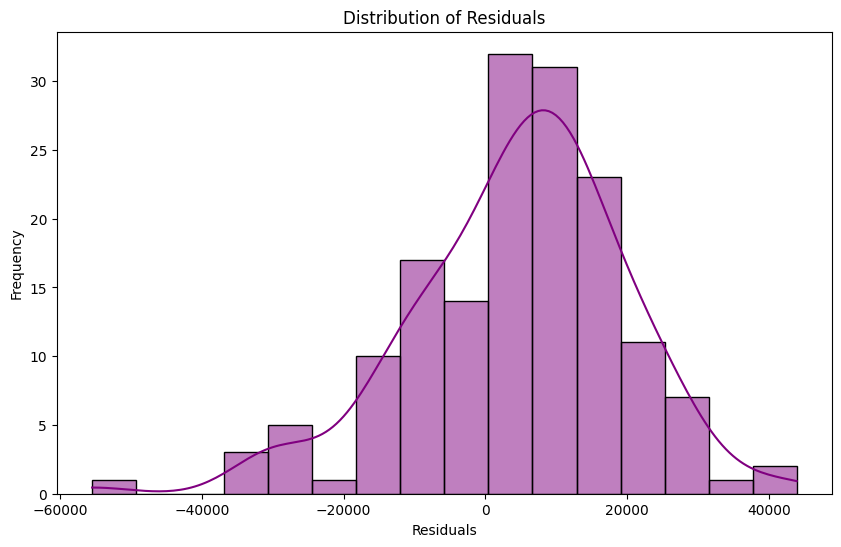

In [46]:
# Plot distribution of errors
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [47]:
# Calculate RMSE (Root Mean Squared Error)
rmse = math.sqrt(mean_squared_error(y_test, predicted_values))
print(f'RMSE: {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predicted_values)
print(f'MAE: {mae}')

# Calculate R² score
r2 = r2_score(y_test, predicted_values)
print(f'R² Score: {r2}')



RMSE: 15821.70308193345
MAE: 12668.03177674741
R² Score: 0.7455250644462007


In [48]:
# Calculate accuracy in percentages
accuracy_percentage = r2 * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 74.55%
